# Understanding the landscape of YouTube Home Workout Creators

**Since Covid-19 spread globally, many countries imposed lockdown and quarantine. As so, sucked at home many people have to turn to YouTube and look for workout videos to keep active. Home workout content creators become the top lists during that time however, it is a competitive platforms for all without exception, no matter of whom target the general public, or more niche area. It evokes my interests to understand the landscape of YouTube fitness creators. How do they vary from each other? What are they targeted audiences? What are their mindsets conveying to watchers?**

## PLAN: Outline the scope pf this project
This project aims to provide insights into the characteristics and strategies of successful fitness channels and offer recommendations for marketing or new content creators. It includes:<p>
1. Identity and compare the Popular Workout YouTuber
2. Analysis of Content and Sentiment
3. Audience comment Analysis
4. Summary and Recommendation



Notes:
1. The Home Workout Creators is whom focus on follow along videos only.

### Import Data And Data Cleaning

In [60]:
 #import library

import pandas as pd
import seaborn as sns
import plotly.express as px
from matplotlib import ticker
from wordcloud import WordCloud
from matplotlib import pyplot as plt
import numpy as np



In [161]:
video_df = pd.read_csv('fitness_youtuber_video_data copy.csv')
video_df.head()

Unnamed: 0     video_id channelTitle  \
0           0  GFvJ9HrUeEE       MadFit   
1           1  gIdjbSnliYM       MadFit   
2           2  ZskCtrjTKdo       MadFit   
3           3  xoeiNJigBlk       MadFit   
4           4  8N7CF1WuFTY       MadFit   

                                               title  \
0  20 MIN FULL BODY STRENGTH - Apartment & Small ...   
1  ditch the traditional cardio workouts and DO T...   
2  Chappell Roan - Good Luck, Babe! FULL BODY DAN...   
3                    Exercise should be FUN! #shorts   
4  Meet The MadFit App’s Newest STRENGTH Trainer!...   

                                         description  \
0  If you live in an apartment or feel limited wo...   
1                                                NaN   
2  Try this full body dance workout to Chappell R...   
3                                                NaN   
4                                                NaN   

                                                tags           publishedAt  \
0  ['full body workout', 'home workout', 'at home...  2024-06-26T14:00:22Z   
1                                                NaN  2024-06-24T15:48:27Z   
2  ['chappell', 'roan', 'chappell roan', 'chappel...  2024-06-22T15:15:11Z   
3                                                NaN  2024-06-22T14:00:47Z   
4                                                NaN  2024-06-21T15:51:54Z   

   viewCount  likeCount  favouriteCount  dislikeCount  commentCount  duration  \
0    29148.0     1806.0             NaN           NaN          66.0  PT22M35S   
1    36698.0        NaN             NaN           NaN          35.0     PT23S   
2    70912.0     2857.0             NaN           NaN         173.0   PT3M52S   
3    44818.0        NaN             NaN           NaN          25.0     PT25S   
4    37178.0        NaN             NaN           NaN          38.0      PT1M   

  definition  caption  
0         hd    False  
1         hd    False  
2         hd    False  
3         hd    False  
4         hd    False

In [162]:
video_df = video_df.drop(['Unnamed: 0', 'description'], axis = 1)

In [8]:
video_df.columns

Index(['video_id', 'channelTitle', 'title', 'tags', 'publishedAt', 'viewCount',
       'likeCount', 'favouriteCount', 'dislikeCount', 'commentCount',
       'duration', 'definition', 'caption'],
      dtype='object')

In [9]:
video_df.shape

(11748, 13)

In [10]:
video_df.isnull().sum()

video_id              0
channelTitle          0
title                 0
tags               2031
publishedAt           0
viewCount             1
likeCount           203
favouriteCount    11748
dislikeCount      11748
commentCount          4
duration              0
definition            0
caption               0
dtype: int64

In [11]:
video_df = (video_df.drop(['favouriteCount', 'dislikeCount'], axis = 1))

In [12]:
video_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11748 entries, 0 to 11747
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   video_id      11748 non-null  object 
 1   channelTitle  11748 non-null  object 
 2   title         11748 non-null  object 
 3   tags          9717 non-null   object 
 4   publishedAt   11748 non-null  object 
 5   viewCount     11747 non-null  float64
 6   likeCount     11545 non-null  float64
 7   commentCount  11744 non-null  float64
 8   duration      11748 non-null  object 
 9   definition    11748 non-null  object 
 10  caption       11748 non-null  bool   
dtypes: bool(1), float64(3), object(7)
memory usage: 929.4+ KB


In [13]:
#find the numeric columns and change the data type
numeric_cols = ['viewCount', 'likeCount', 'commentCount']
video_df[numeric_cols] = video_df[numeric_cols].apply(pd.to_numeric, errors = 'coerce', axis = 1)

In [14]:
#find the date and change it to nicer format

video_df['publishedAt'] = pd.to_datetime(video_df['publishedAt'])
video_df['publishedDayName'] = video_df['publishedAt'].dt.day_name()
video_df['publishedAt'] = video_df['publishedAt'].apply(lambda x: x.strftime("%Y-%m-%d %H:%M:%S"))
video_df['publishedAt'] = pd.to_datetime(video_df['publishedAt'])

In [33]:
def get_seconds(iso_str):
    hours = re.search(r"(\d+)H", iso_str)
    hours = hours.group(1) if hours else 0
    minutes = re.search(r"(\d+)M", iso_str)
    minutes = minutes.group(1) if minutes else 0
    seconds = re.search(r"(\d+)S", iso_str)
    seconds = seconds.group(1) if seconds else 0
    return int(hours) * 3600 + int(minutes) *60 + int(seconds)
video_df['durationSec'] = video_df['duration'].apply(get_seconds).astype(int)

In [34]:
video_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11748 entries, 0 to 11747
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   video_id          11748 non-null  object        
 1   channelTitle      11748 non-null  object        
 2   title             11748 non-null  object        
 3   tags              9717 non-null   object        
 4   publishedAt       11748 non-null  datetime64[ns]
 5   viewCount         11747 non-null  float64       
 6   likeCount         11545 non-null  float64       
 7   commentCount      11744 non-null  float64       
 8   duration          11748 non-null  object        
 9   definition        11748 non-null  object        
 10  caption           11748 non-null  bool          
 11  publishedDayName  11748 non-null  object        
 12  durationSec       11748 non-null  int64         
 13  tag_count         11748 non-null  int64         
dtypes: bool(1), datetime64



---



### Identity and Compare the Popular Workout YouTuber

In [35]:
df = video_df
df['tag_count'] = df.tags
df.tag_count = df.tag_count.replace([None], 0).apply(lambda x: len(x) if x != 0 else 0)

In [36]:
#detect and remove noise data-- short videos
#sort out short videos
short_videos = pd.DataFrame(columns=df.columns)
for i in df.index:
    if 'shorts' in df.iloc[i,2]:
        tempt = df.iloc[i,:]
        short_videos = pd.concat([short_videos, tempt.to_frame().T])
long_videos = df[~df.video_id.isin(short_videos.video_id) & (df.durationSec >=300)]

In [37]:
long_videos['current_date'] = pd.to_datetime('2024-07-24')
long_videos['days'] = long_videos['current_date'] - long_videos['publishedAt']
long_videos['days'] = long_videos['days'].dt.days

<ipython-input-37-6c94fc9ba6ee>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-37-6c94fc9ba6ee>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-37-6c94fc9ba6ee>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [38]:
#detect and remove noise data-- non-workout videos
workout_videos = long_videos.copy()
other_type_video = ['eat', 'recipes', 'meals','vlog','drinks', 'meal', 'recipe','Vlog', 'vegan', 'travel', 'a day with me', 'a day', 'subscriber', 'million','mental health','podcast','nutrition', 'fitness app', 'app', 'midset', 'questions', 'q&a']

workout_videos['tag_list'] = workout_videos['tags'].str.split(',').apply(lambda x: [tag.strip().lower() for tag in x] if isinstance(x, list) else [])

# Function to check if any word from other_type_video is in the tag list
def contains_excluded_word(tag_list, exclude_list):
    for tag in tag_list:
        if tag[1:-1] in exclude_list:
            return True
    return False
    # return any(exclude_word in tag for tag in tag_list for exclude_word in exclude_list)
# def contains_excluded_word(tag_list, excluded_words):
#     return any(word in tag_list for word in excluded_words)
# a = workout_videos['tag_list']
# b = [word.lower() for word in other_type_video]
mask = workout_videos['tag_list'].apply(lambda x: not contains_excluded_word(x, [word.lower() for word in other_type_video]))
workout_videos = workout_videos[mask]

In [39]:
channel_sub = {
    "Lilly Sabri": 5.45,
    "Caroline Girvan": 3.16,
    "Chloe Ting": 25.3,
    "Eleni Fit": 1.22,
    "Boho Beautiful Yoga": 2.95,
    "Move With Nicole": 3.05,
    "emi wong": 6.77,
    "growingannanas" : 5.98,
    "Pamela Reif" : 10,
    "MadFit": 9.43,
    "Heather Roberston": 2.51,
    'Sydney Cummings Houdyshell':1.59,
    'The Body Coach TV by Joe Wicks':2.82,
    'FitnessBlender': 6.61
}

workout_videos['sub(million)'] = workout_videos['channelTitle'].map(channel_sub)

In [40]:
workout_videos['create'] =  workout_videos.groupby('channelTitle')['publishedAt'].transform(lambda x: x.min().year)
workout_videos.head()

video_id channelTitle  \
0   GFvJ9HrUeEE       MadFit   
8   fcWHwYzMQwE       MadFit   
13  ZTkDOPufyiM       MadFit   
15  X17GuUz9b1k       MadFit   
19  tPrqiL4Ce2c       MadFit   

                                                title  \
0   20 MIN FULL BODY STRENGTH - Apartment & Small ...   
8             5 MIN TONED ARMS WORKOUT - No Equipment   
13  200 REP SQUAT CHALLENGE (Booty & Thigh Workout...   
15  30 MIN FULL BODY DANCER SCULPT WORKOUT - At Ho...   
19  15 MIN ROLL OUT OF BED/PYJAMA WORKOUT (No jump...   

                                                 tags         publishedAt  \
0   ['full body workout', 'home workout', 'at home... 2024-06-26 14:00:22   
8   ['home workout', 'at home workout', 'full body... 2024-06-19 14:00:37   
13  ['squat challenge', 'squat', '200 rep squat ch... 2024-06-12 14:00:26   
15  ['30 min workout', '30 min workout no equipmen... 2024-06-07 14:00:33   
19  ['morning workout', 'roll out of bed workout',... 2024-06-04 14:00:43   

    viewCount  likeCount  commentCount  duration definition  caption  \
0     29148.0     1806.0          66.0  PT22M35S         hd    False   
8     83138.0     4314.0         121.0   PT7M18S         hd    False   
13    96532.0     4387.0         167.0   PT17M4S         hd    False   
15   118894.0     5388.0         212.0  PT32M35S         hd    False   
19   120783.0     5324.0         175.0  PT17M29S         hd    False   

   publishedDayName  durationSec  tag_count current_date  days  \
0         Wednesday         1355        476   2024-07-24    27   
8         Wednesday          438        485   2024-07-24    34   
13        Wednesday         1024        434   2024-07-24    41   
15           Friday         1955        503   2024-07-24    46   
19          Tuesday         1049        521   2024-07-24    49   

                                             tag_list  sub(million)  create  
0   [['full body workout', 'home workout', 'at hom...          9.43    2018  
8   [['home workout', 'at home workout', 'full bod...          9.43    2018  
13  [['squat challenge', 'squat', '200 rep squat c...          9.43    2018  
15  [['30 min workout', '30 min workout no equipme...          9.43    2018  
19  [['morning workout', 'roll out of bed workout'...          9.43    2018



---



In [41]:
colors = {"Lilly Sabri": "indigo",
          "Caroline Girvan": "mediumaquamarine",
          "Chloe Ting": "pink",
          "Eleni Fit": "blue",
          "Boho Beautiful Yoga": "darkturquoise",
          "Move With Nicole": "orange",
          "emi wong": "cornflowerblue",
          "growingannanas" : "violet",
          "Pamela Reif" : "PaleVioletRed",
          "MadFit": "tomato",
          "Heather Roberston": 'maroon',
          'Sydney Cummings Houdyshell':'orange',
          'The Body Coach TV by Joe Wicks':'coral',
          'FitnessBlender': 'red'
          }

In [25]:
fig = px.histogram(workout_videos, x="publishedAt",
                   template  = "simple_white",height = 800, color_discrete_map=colors  )

# create graph
fig.update_layout(showlegend=False,
                  xaxis_title="Published Date", yaxis_title="Number of Videos",
                  title= dict(text ="<b>Video uploads Over Time<b>",
                              x=0.5,
                              font = dict(family ="Old Standard TT", size = 24) ), )

When COVID-19 spread and many countries went into lockdown between March and June 2020, the number of follow-along workout videos uploaded to YouTube spiked dramatically. The histogram of uploads over time highlights how YouTubers responded to the increased demand for workout videos. Following this initial surge, the number of new videos decreased, though there were still some peak months. This decline could be due to various factors, including creator burnout, lifestyle changes, or the difficulty of maintaining a frequent upload schedule. Before the pandemic, the popularity of this video genre was already rising, especially after 2016, with more creators joining the platform.

Now the popularity of this home workout videos are decreasing to the level before the Covid in 2019, which might needs new evolution and creation in changing with viwers.

In [27]:
fig = px.histogram(long_videos, x="publishedAt", color = "channelTitle", facet_col="channelTitle",
                   template  = "simple_white", facet_col_wrap =3,height = 1000,
           color_discrete_map=colors,  opacity=0.7)

# create graph
fig.update_layout(showlegend=False,
                  title= dict(text ="<b>Video uploads by channel <b>",
                              x=0.5,
                              font = dict(family ="Old Standard TT", size = 24) ), )

Looking at the uploads individually, demonstrates how each YouTuber increased their upload schedule with MadFit, Lily Sabri, The body coach Tv by Joe Wicks, Pamela Reif and Boho beautiful Yoga. For Pamela Reif, she created the account on 2026 but is not active until 2020. This might because she removes the most videos or keep inactivity in her early years. There are some accounts that star to increase uploads such as Move with Nicole, Caroline Girvan, growningannas. The rest seems to maintain their usual frequency or even reduce the contents.

In [ ]:
fig = px.box(long_videos, x="publishedDayName", color="channelTitle",
                   template="simple_white",
                   color_discrete_map=colors)


fig.update_layout(showlegend=True,
                  title= dict(text ="<b>Video uploads Schedule<b><br><sup>Data from YouTube API - 24th Jun 2024 </sup>",
                              x=0.5,
                              font = dict(family ="Old Standard TT", size = 24) ))

The most common date for upload appears to be on Monday and  Thursday in contrast with the rest days which appears to be least days of uploading. It might owing to the YouTube algorithm or the viwer's habits.

Spoting on Pamela and Chloe's schedule. Pamela usually uploads on Wednesday and Friday while Chloe opts on Tuesday and Monday. They have different schedules but are both so successful on the plotform. Therefore, the consistency in a manner that could be sustained over time is the key rather than requiring to upload every day.

In [42]:
fig = px.box(long_videos, x = "durationSec", color = "channelTitle", template  = "plotly_white",hover_name ="title",
           color_discrete_map=colors)

# format graph
fig.update_layout(showlegend=True,
                  title= dict(text ="<b>Average Length of Videos <b><br><sup>Data from YouTube API - 24th Jun 2024 </sup>",
                              x=0.5,
                              font = dict(family ="Old Standard TT", size = 24) ))

The length of video is the a key differentiation among creators. Many creators appear to have differnt strategies for video length.

Like Pamela Reif, Chloe Ting and emi wong, they have specific and consistent video length range, favoring shorter and quicker ones but they also create longer contents.

Sydney cumming houdyshell has the longest videos, with a median duration exceeding all other channels. They offer a variety of workout formats, which could explain the wider range and longer average video length.

Caroline Girvan has a narrow interquartile range, suggesting consistency in video length. This aligns with her structured workout programs like Epic, which typically have videos of similar durations.

The content creators have a certain of strategies of video length however, they will also observe the longer and shorter types of video, seeking new chance and scope of their audiences.





In [45]:
colors_year = {2014: "indigo",
         2015: "mediumaquamarine",
         2016: "pink",
         2017: "lightblue",
         2018: "darkturquoise",
         2019: "orange",
         2020: "cornflowerblue",
         2021: "violet",
         2022 : "PaleVioletRed",
         2023: "tomato",
         2024: "darkturquoise",

         }

fig = px.box(long_videos, x = "durationSec", color = long_videos["publishedAt"].dt.year, template  = "plotly_white",hover_name ="title",
           color_discrete_map=colors_year)

# format graph
fig.update_layout(showlegend=True,
                  title= dict(text ="<b>Average Length of Videos over Time <b><br><sup>Data from YouTube API - 24th June </sup>",
                              x=0.5,
                              font = dict(family ="Old Standard TT", size = 24) ))

while workout video lengths vary significantly across years, more recent years like 2022 and 2023 show consistency with the length around 15 mins.

In [61]:
fig = px.box(workout_videos, x = "viewCount", color = "channelTitle", template  = "plotly_white", hover_name ="title",
           color_discrete_map=colors)

# format graph
fig.update_layout(showlegend=True,
                  title= dict(text ="<b>Distribution of views<b><br><sup>Data from YouTube API - 24th June </sup>",
                              x=0.5,
                              font = dict(family ="Old Standard TT", size = 24) ))

Chloe Ting has the best performance datasets with two video garnering more than 500M and 200M respectively. These two videos are published As Chloe Ting is the earliest creator among them. However, in terms of view count distribution, Pamela Reif garners average more views than Chloe and the rest for most of her contents. Interestingly, Pamela Reif joined Youtube 2 years later than Chloe Ting and has half subscribers. However, the boxplot of view counts is less meaningful owing to the different published dates. Therefore, it is necessary to adjust the view count by the duration days.

In [62]:
workout_videos['view_count_per_day'] = workout_videos['viewCount'] / workout_videos['days']
workout_videos['like_count_per_day'] = workout_videos['likeCount'] / workout_videos['days']
workout_videos['comment_count_per_day'] = workout_videos['commentCount'] / workout_videos['days']

In [63]:
fig = px.box(workout_videos, x = "view_count_per_day", color = "channelTitle", template  = "plotly_white", hover_name ="title",
           color_discrete_map=colors)

# format graph
fig.update_layout(showlegend=True,
                  title= dict(text ="<b>Distribution of views(Adjust by days of uploaded)<b><br><sup>Data from YouTube API - 24th June </sup>",
                              x=0.5,
                              font = dict(family ="Old Standard TT", size = 24) ))

In [64]:
workout_videos['log_view_count'] = np.log(workout_videos['view_count_per_day'])

In [65]:
fig = px.histogram(workout_videos, x="log_view_count", color = "channelTitle", facet_col="channelTitle",
                   template  = "simple_white", facet_col_wrap =3,height = 1000,
           color_discrete_map=colors,  opacity=0.7)

# create graph
fig.update_layout(showlegend=False,
                  title= dict(text ="<b> <b>",
                              x=0.5,
                              font = dict(family ="Old Standard TT", size = 24) ), )

In [98]:
average_video_view_count = workout_videos.groupby(['channelTitle', 'rounded_durationSec'])['log_view_count'].mean().reset_index()

preferred_durations = list(range(300, 7201, 60))


def round_to_preferred_duration(x):
    return min(preferred_durations, key=lambda y: abs(x - y))

#workout_videos['rounded_durationSec'] = workout_videos['durationSec'].apply(round_to_preferred_duration)

In [103]:
fig = px.scatter(workout_videos, x='rounded_durationSec', y="log_view_count",
                   template  = "simple_white", height = 1000,
           color_discrete_map=colors, )

fig.update_layout(showlegend=False,
                  title= dict(text ="<b> <b>",
                              x=0.5,
                              font = dict(family ="Old Standard TT", size = 24) ), )

In [105]:
np.corrcoef(workout_videos.dropna()['rounded_durationSec'],workout_videos.dropna()['log_view_count'])

array([[ 1.        , -0.16184412],
       [-0.16184412,  1.        ]])

To understand the relationship between the length of video and the view count, the plot shows that shorter workout videos (up to about 33 minutes) are the most common and can have a wide range of view counts, while fewer longer videos exist but still achieve significant views. The variety in view counts across all durations highlights that both short and long workout videos can be successful, but shorter videos are more prevalent.

In [147]:
workout_videos.columns

Index(['video_id', 'channelTitle', 'title', 'tags', 'publishedAt', 'viewCount',
       'likeCount', 'commentCount', 'duration', 'definition', 'caption',
       'publishedDayName', 'durationSec', 'tag_count', 'current_date', 'days',
       'tag_list', 'sub(million)', 'create', 'view_count_per_day',
       'like_count_per_day', 'comment_count_per_day', 'log_view_count',
       'rounded_durationSec'],
      dtype='object')

In [148]:
fig = px.scatter_3d(workout_videos, x = "view_count_per_day", y = "like_count_per_day", z ="comment_count_per_day", color = "channelTitle", template  = "plotly_white", hover_name ="title",
           color_discrete_map=colors, opacity=0.5, size_max=18,)

# format graph
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

In [139]:

def video_channel_tag_count(channel_title):
    video_channel_df = long_videos[long_videos.channelTitle.isin(channel_title)]

    all_tags = ' '.join(video_channel_df['tags'].dropna())
    tag_list = re.findall(r"'(.*?)'", all_tags.lower())

    tag_count_list = {}
    for tag in tag_list:
        tag = tag.strip()
        if tag and tag != ',' and tag != '] [':
            tag_count_list[tag] = tag_count_list.get(tag,0) + 1
    tag_count_list = pd.DataFrame.from_dict(tag_count_list, orient='index', columns = [ 'count']).reset_index()
    tag_count_list.columns = ['tag', 'count']
    tag_count_list = tag_count_list.sort_values(by = 'count', ascending = False)

    return tag_count_list

In [140]:
def tag_count_bar(data,channel):

  fig = px.bar(data, x = "tag", y = "count",
            template  = "simple_white" )

# format graph
  fig.update_traces(marker_color='mediumpurple')

  fig.update_layout(showlegend=True,
                  title= dict(text ="<b>Popular Tags <b><br><sup>Data from YouTube API - 8th Aug </sup>",
                              x=0.5,
                              font = dict(family ="Old Standard TT", size = 24) ))
  return fig


    # sns.set_style("darkgrid")
    # plt.figure(figsize=(10, 6), facecolor='white')
    # sns.barplot(data, x='tag', y='count', color=colors[channel])
    # plt.title(str(channel )+'\nData from YouTube API - 24th June, 2024', fontsize=15, weight='bold', ha='center')
    # plt.xlabel('count', fontsize=12, weight='bold')
    # plt.ylabel('tag', fontsize=12, weight='bold')
    # plt.xticks(rotation=45)
    # plt.yticks(rotation=0)
    # plt.gca().set_facecolor('white')
    # plt.tight_layout()
    # plt.show()

In [142]:
tag_count_bar(video_channel_tag_count(workout_videos.channelTitle.tolist()).head(15), "All Channel")

 From the tga count, we could find that the high level of homogenization of videos. Most workout videos from fitness Youtubers focus on losing weights. THe high frequency of "flat stomach", "lose belly fat". "fat burn" in Lilly Sabri, "loss weight" in Chloe Ting and "summmerbody" in Eleni Fit, "summer body" and "lose weight" in emoi wong. They have similar tags such as "home workout", "exercise" without big differentiation. Particularly for Eleni Fit, her tags are quite consistent with similar counts, which could show that the content in her videos are quite similar without much varying.


However, within the group of content creators who focus on home workout, their types of workout and the audience they serve are different. The high frequency of "dumbbell", "fitness" in the tags from Caroline Girvan, indicating that she may be catering to a more advanced audience with respect to fitness/workouts who aim for strength. Pamela's tags sit in-between of loss weigth and strength. Although in Pamela Reif's videos with greater learning to weight loss, she also uses term "muscle", "sport", which might tell that she tried to convey different mindset of doing exercise.

Examining tags from growingannas, she fits strongly with the "active" focused YouTubers but her strength lies very much with HITT workouts. For move with nicol, Boho Beautiful Yoga they specialise in som areas.

From the tags, it is interesting to mention that most workout videos focus on abs, booty and full body, with much lesser learning on arm or back.

In [157]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import re


# Function to count tags for a given channel
def video_channel_tag_count(channel_title):
    video_channel_df = workout_videos[workout_videos.channelTitle.isin(channel_title)]

    all_tags = ' '.join(video_channel_df['tags'].dropna())
    tag_list = re.findall(r"'(.*?)'", all_tags.lower())

    tag_count_list = {}
    for tag in tag_list:
        tag = tag.strip()
        if tag and tag != ',' and tag != '] [':
            tag_count_list[tag] = tag_count_list.get(tag, 0) + 1

    tag_count_list = pd.DataFrame.from_dict(tag_count_list, orient='index', columns=['count']).reset_index()
    tag_count_list.columns = ['tag', 'count']
    tag_count_list = tag_count_list.sort_values(by='count', ascending=False)

    return tag_count_list

# Function to generate the bar chart
def tag_count_bar(data, channel):
    fig = px.bar(data, x="tag", y="count", template="simple_white")

    # Format graph
    fig.update_traces(marker_color='mediumpurple')
    fig.update_layout(
        showlegend=True,
        title=dict(
            text="<b>Popular Tags <b><br><sup>Data from YouTube API - 8th Aug </sup>",
            x=0.5,
            font=dict(family="Old Standard TT", size=24)
        )
    )
    return fig

# Generate initial data for the first channel
initial_channel = ['Pamela Reif']
initial_data = video_channel_tag_count(initial_channel)

# Create initial figure
fig = tag_count_bar(initial_data.head(20), initial_channel[0])

# List of channels for the dropdown
channels = workout_videos['channelTitle'].unique()

# Create the dropdown menu
dropdown_buttons = [
    {
        'label': channel,
        'method': 'update',
        'args': [{'y': [video_channel_tag_count([channel])['count']],
                  'x': [video_channel_tag_count([channel]).head(20)['tag']]},
                 {'title': f"<b>Popular Tags for {channel} <b><br><sup>Data from YouTube API - 24th June </sup>"}]
    }
    for channel in channels
]

fig.update_layout(
    updatemenus=[{
        'buttons': dropdown_buttons,
        'direction': 'down',
        'showactive': True,
    }]
)

fig.show()


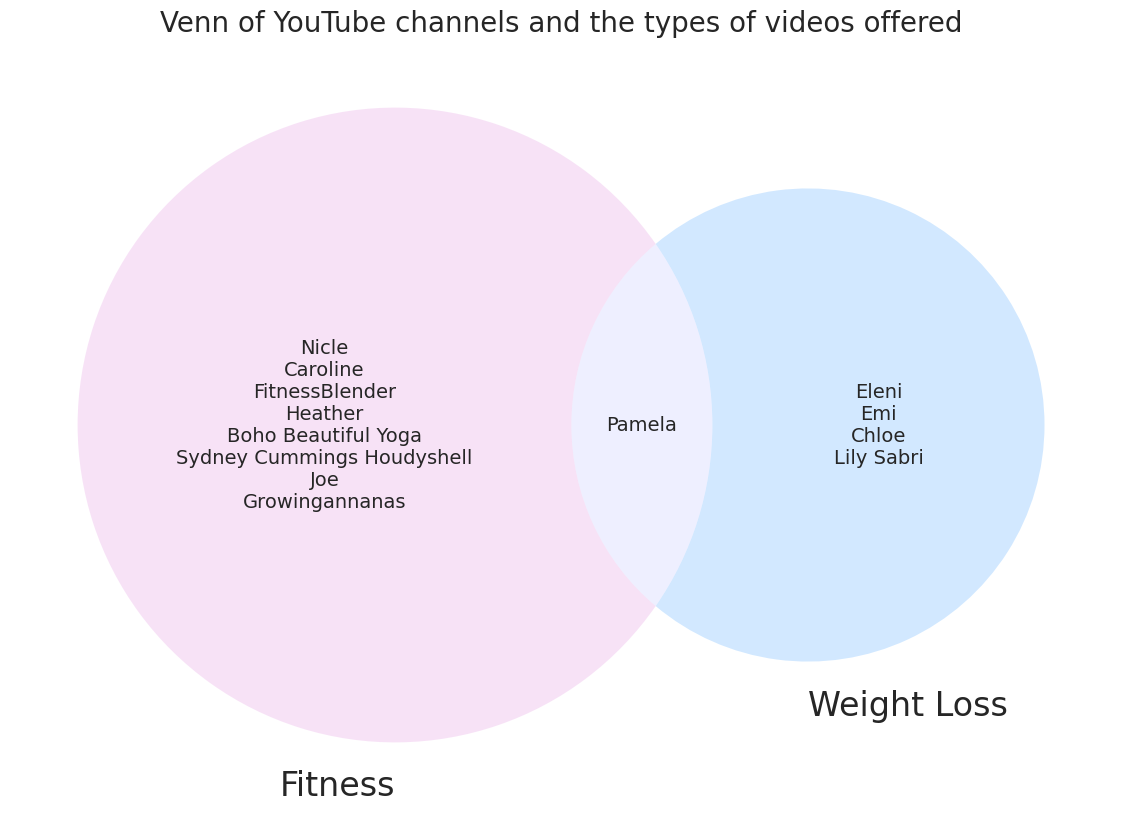

In [160]:
from matplotlib_venn import venn2

# create graph
plt.figure(figsize = (25,10))
labels=['Fitness','Weight Loss']

fitness = set(["Joe", "Growingannanas", 'Heather', 'Pamela', "FitnessBlender", 'Nicle', 'Caroline', 'Heather', 'Sydney Cummings Houdyshell',  'Boho Beautiful Yoga'])
wehightloss = set(["Emi","Chloe", 'Pamela','Eleni', 'Lily Sabri'])


diagram = venn2(subsets=[fitness,wehightloss] ,
                 set_labels=labels,set_colors=("orchid","dodgerblue"),alpha=0.2 )


diagram.get_label_by_id("10").set_text("\n".join(fitness - wehightloss))
diagram.get_label_by_id("11").set_text("\n".join(fitness & wehightloss))
diagram.get_label_by_id("01").set_text("\n".join(wehightloss - fitness))

# format graph
for text in diagram.set_labels:
    text.set_fontsize(24)

for text in diagram.subset_labels:
    text.set_fontsize(14)

plt.title("Venn of YouTube channels and the types of videos offered", fontsize = 20)
plt.show()